## Demo Frozen-lake using DQN agent
 - Demonstrates the [Frozen-lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) problem
 - Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.
 - The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.Holes in the ice are distributed in set locations when using a pre-determined map or in random locations when a random map is generated.
 - The use of a DQN agent is used to balance the Cart-pole
 - Steps of the solution include:
   - Step 1: Add imports
   - Step 2: Instantiate the environment and the DQN agent
   - Step 3: Train the DQN RL agent
   - Step 4: Plot the reward curves of the trained RL agent
   - Step 5: Evaluate the trained DQN RL agent


#### Step 1: Add imports

In [1]:
import gymnasium as gym
import sys
import os
from dataclasses import asdict

sys.path.insert(1, "../")

from src.main.evaluations.evaluate_agent import EvaluateAgent
from src.main.rl_agents.dqn_agent import DqnAgent
import src.main.configs.global_configs as configs
from src.main.utility.utils import Helpers
from src.main.utility.chart_results import ChartResults


#### Step 2: Instantiate the environment and the SARSA agent

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
dqn_agent = DqnAgent(env)


#### Step 3: Train the DQN RL agent

In [3]:
qn_network, train_rewards = dqn_agent.train()
Helpers.serialObject(dqn_agent, configs.FROZEN_LAKE_DQN_MODEL_FILE_PATH)


Episode 200, AvgReward 0.075
Episode 400, AvgReward 0.675
Episode 600, AvgReward 0.900
Episode 800, AvgReward 0.965
Episode 1000, AvgReward 0.985
Episode 1200, AvgReward 0.985


#### Step 4: Plot the reward curves of the trained RL agent

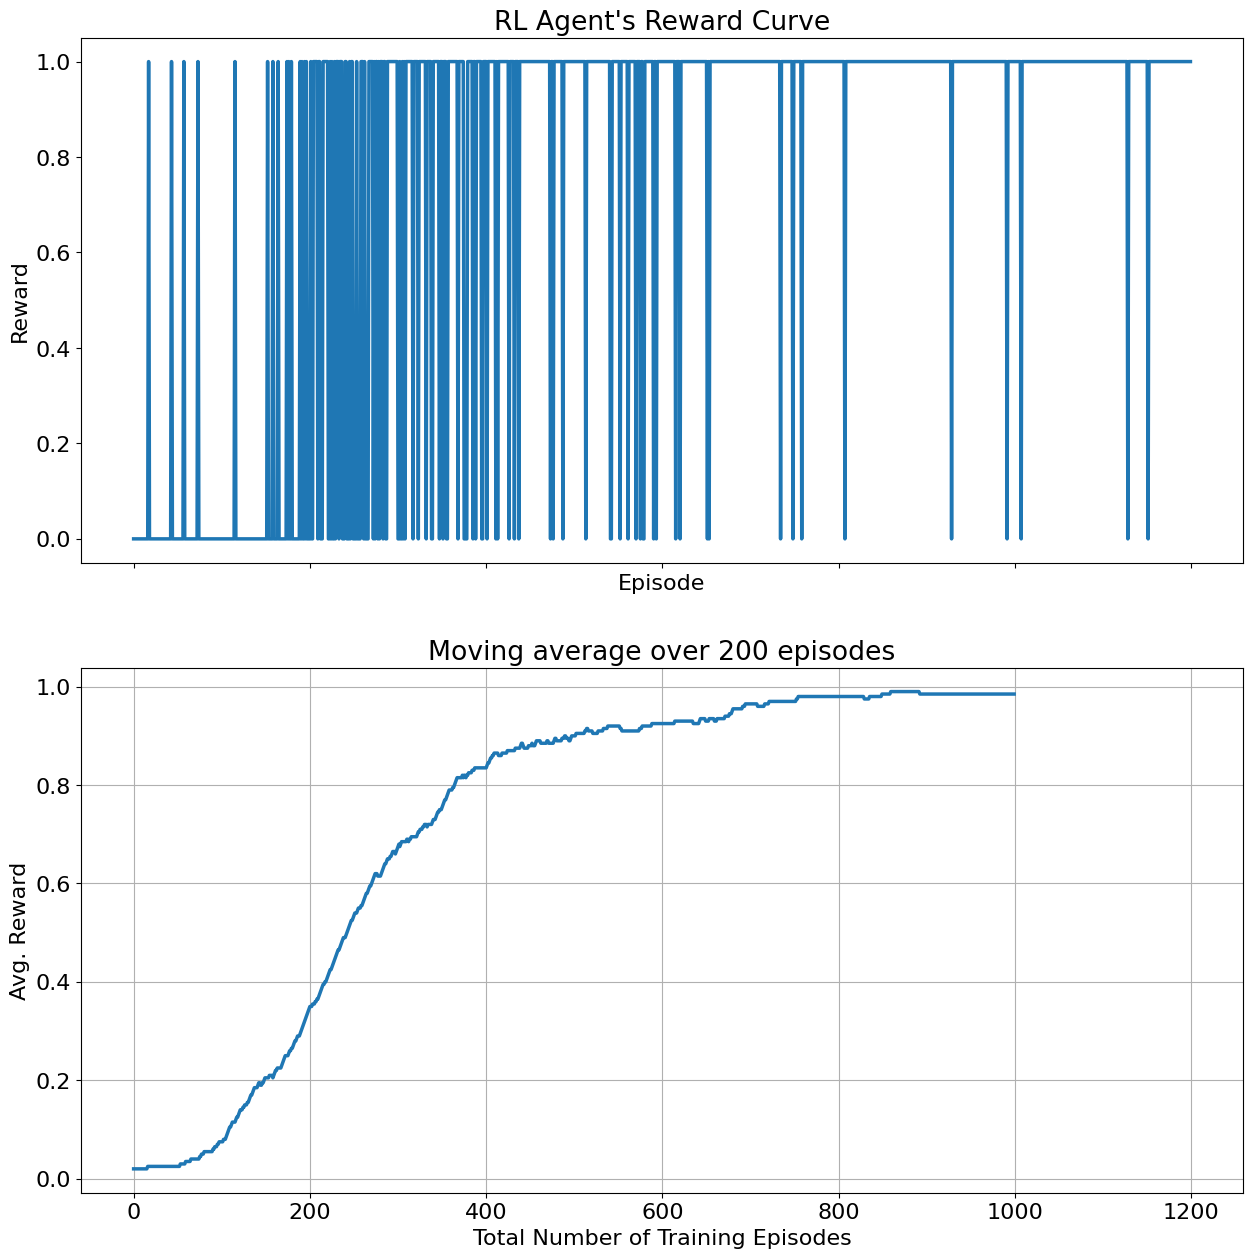

In [4]:
ChartResults.plotRewardCurve(train_rewards, window_size=200)


#### Step 5: Evaluate the trained DQN RL agent

In [5]:
agent = Helpers.deserializeObject(configs.FROZEN_LAKE_DQN_MODEL_FILE_PATH)
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
agent.evaluate(env, render_mode="human")